In [1]:
#importting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Importing Data

In [2]:
train_df = pd.read_csv('D:/2022_regression_challenge/train.csv')
test_df = pd.read_csv('D:/2022_regression_challenge/test.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
train_df.head()

,Id,score,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
0,403,34.130,0.00243,0.000018,0.00108,0.00124,0.00323,0.01147,0.105,0.00625,0.00658,0.00834,0.01874,0.005750,28.897,0.46124,0.58305,0.12722,0.466722,-0.824511,-1.217875,-0.432389,-1.455320,-0.280675,0.681113,0.375320,0.764563,-0.237859,-0.282198
1,1477,19.000,0.00280,0.000021,0.00087,0.00128,0.00260,0.01575,0.137,0.00812,0.00868,0.01072,0.02435,0.009616,26.027,0.55084,0.57033,0.12869,0.805985,0.080466,-0.812559,1.512731,0.070331,2.368754,-0.256309,1.315997,0.093631,-0.389538,1.396095
2,5342,43.104,0.00412,0.000028,0.00162,0.00213,0.00487,0.02644,0.242,0.01150,0.01423,0.02545,0.03450,0.019516,23.010,0.59287,0.60478,0.26151,2.034902,-0.060555,-0.027766,-0.123652,0.820478,1.054439,1.922146,-1.262435,2.017997,0.687229,-0.935456
3,3812,38.814,0.00781,0.000043,0.00451,0.00399,0.01353,0.02975,0.261,0.01650,0.01610,0.02198,0.04951,0.019363,21.479,0.53716,0.75339,0.19362,-0.921909,-0.153332,-1.298289,1.410486,1.950012,0.613255,0.492419,0.124454,0.891332,0.401179,0.383195
4,138,41.034,0.00488,0.000026,0.00265,0.00251,0.00794,0.04983,0.448,0.02688,0.02876,0.04052,0.08064,0.013138,23.136,0.46322,0.57274,0.19423,1.650766,-0.985639,-0.469064,-2.579920,0.173884,-0.330941,0.089597,0.617369,-0.183967,0.408726,1.607871


In [4]:
test_df.head()

,Id,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
0,1178,0.00465,0.000021,0.00253,0.00254,0.00760,0.01743,0.184,0.00858,0.00974,0.01495,0.02573,0.028995,24.464,0.44061,0.57812,0.18680,1.517527,-0.622937,-0.345015,-0.172781,1.632996,-0.819828,1.026481,-1.395062,1.065962,-1.854161,0.424490
1,4954,0.03805,0.000184,0.01723,0.02981,0.05170,0.15431,1.450,0.07356,0.13302,0.13644,0.22069,0.559070,4.681,0.70597,0.56666,0.50371,0.368620,-0.563150,-0.403509,-1.149322,0.152665,-0.053284,-0.287827,-0.119217,0.612956,-0.731272,-0.608852
2,1269,0.01094,0.000123,0.00429,0.00502,0.01288,0.04010,0.368,0.01749,0.02065,0.03685,0.05247,0.025390,19.895,0.69284,0.80096,0.40036,0.915333,0.077701,-0.061947,0.581850,-0.059723,0.226147,1.613662,0.114775,0.170831,0.159562,-0.571270
3,5269,0.00414,0.000022,0.00183,0.00233,0.00550,0.03073,0.272,0.01636,0.02040,0.02387,0.04909,0.014141,21.436,0.55022,0.57203,0.26542,0.146151,-0.106470,0.923359,-1.290854,0.959982,0.232197,-0.669471,-0.049756,-0.110285,0.437221,-1.399420
4,143,0.00688,0.000041,0.00390,0.00307,0.01171,0.04896,0.419,0.03117,0.02345,0.03018,0.09352,0.011702,20.937,0.49023,0.55236,0.14037,0.976735,-0.216855,0.516351,1.194716,-0.451112,-0.063620,-1.356854,-0.093523,0.219119,0.943376,0.146435


In [5]:
print(train_df.shape, test_df.shape)

(4141, 29) (1734, 28)


## EDA

##### Training data 

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      4141 non-null   int64  
 1   score   4141 non-null   float64
 2   V3      4141 non-null   float64
 3   V4      4141 non-null   float64
 4   V5      4141 non-null   float64
 5   V6      4141 non-null   float64
 6   V7      4141 non-null   float64
 7   V8      4141 non-null   float64
 8   V9      4141 non-null   float64
 9   V10     4141 non-null   float64
 10  V11     4141 non-null   float64
 11  V12     4141 non-null   float64
 12  V13     4141 non-null   float64
 13  V14     4141 non-null   float64
 14  V15     4141 non-null   float64
 15  V16     4141 non-null   float64
 16  V17     4141 non-null   float64
 17  V18     4141 non-null   float64
 18  V19     4141 non-null   float64
 19  V20     4141 non-null   float64
 20  V21     4141 non-null   float64
 21  V22     4141 non-null   float64
 22  

In [7]:
train_df.describe()

,Id,score,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
count,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000
mean,2940.652499,29.121340,0.006104,0.000044,0.002964,0.003245,0.008893,0.034051,0.311054,0.017160,0.020166,0.027513,0.051478,0.031895,21.691668,0.541286,0.653501,0.219475,0.010223,-0.012633,-0.025192,-0.000963,0.014772,0.008972,-0.007462,-0.016772,-0.000486,-0.005106,-0.018972
std,1699.192364,10.755535,0.005490,0.000035,0.003076,0.003616,0.009229,0.025476,0.227168,0.013016,0.016394,0.019818,0.039049,0.057913,4.283338,0.101635,0.070514,0.089927,1.022667,1.001635,1.000682,1.008123,0.989822,0.996655,0.988960,1.026635,1.000286,0.990513,1.003466
min,1.000000,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983,-3.368797,-3.380800,-3.478111,-3.477503,-3.640632,-4.101566,-3.325202,-4.181709,-3.271369,-3.914810,-3.940039
25%,1475.000000,21.371000,0.003600,0.000023,0.001590,0.001830,0.004780,0.019260,0.177000,0.009310,0.010820,0.015620,0.027930,0.011063,19.407000,0.469290,0.597100,0.157740,-0.695530,-0.686830,-0.710558,-0.684078,-0.653262,-0.667845,-0.677333,-0.710010,-0.684800,-0.667930,-0.719007
50%,2946.000000,27.630000,0.004900,0.000035,0.002250,0.002480,0.006760,0.027750,0.255000,0.013770,0.016080,0.022960,0.041300,0.018663,21.915000,0.542300,0.645100,0.206200,0.012535,-0.016551,-0.041247,0.010535,0.019838,0.012707,-0.014778,-0.022363,-0.017580,-0.020160,-0.018618
75%,4415.000000,36.483000,0.006770,0.000053,0.003270,0.003430,0.009800,0.039990,0.366000,0.020690,0.024000,0.032920,0.062070,0.031547,24.476000,0.614110,0.710790,0.264070,0.706236,0.656291,0.660537,0.662715,0.676001,0.678279,0.649582,0.657142,0.643342,0.641950,0.659158
max,5873.000000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.239150,1.970000,0.162670,0.162460,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730,4.051689,3.521048,4.089038,3.415772,3.771027,3.904879,3.628111,4.551681,3.833876,3.459594,3.540049


In [8]:
sum(train_df.duplicated())

0

In [9]:
#check for missing values
(train_df.isnull().sum() / train_df.shape[0])

Id       0.0
score    0.0
V3       0.0
V4       0.0
V5       0.0
V6       0.0
V7       0.0
V8       0.0
V9       0.0
V10      0.0
V11      0.0
V12      0.0
V13      0.0
V14      0.0
V15      0.0
V16      0.0
V17      0.0
V18      0.0
V19      0.0
V20      0.0
V21      0.0
V22      0.0
V23      0.0
V24      0.0
V25      0.0
V26      0.0
V27      0.0
V28      0.0
V29      0.0
dtype: float64

<AxesSubplot:xlabel='score', ylabel='Density'>

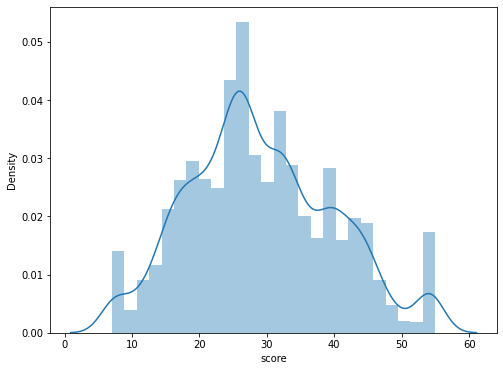

In [10]:
#checking the target distribution
plt.figure(figsize=(8,6))
sns.distplot(train_df['score'])

In [11]:
#skewness
train_df['score'].skew()

0.2750944010514573

The skewness is between -0.5 and 0.5 so as a rule of thumb the data are fairly symmetrical.

In [12]:
train_df.corr()['score']

Id       0.248855
score    1.000000
V3       0.061977
V4       0.055533
V5       0.050209
V6       0.054069
V7       0.050226
V8       0.079528
V9       0.086131
V10      0.064929
V11      0.073285
V12      0.112084
V13      0.064925
V14      0.051288
V15     -0.152277
V16      0.147671
V17     -0.121971
V18      0.141283
V19      0.005401
V20      0.026254
V21     -0.043407
V22      0.010219
V23      0.003865
V24     -0.021065
V25     -0.000255
V26      0.011327
V27     -0.018741
V28     -0.021500
V29      0.016380
Name: score, dtype: float64

<AxesSubplot:>

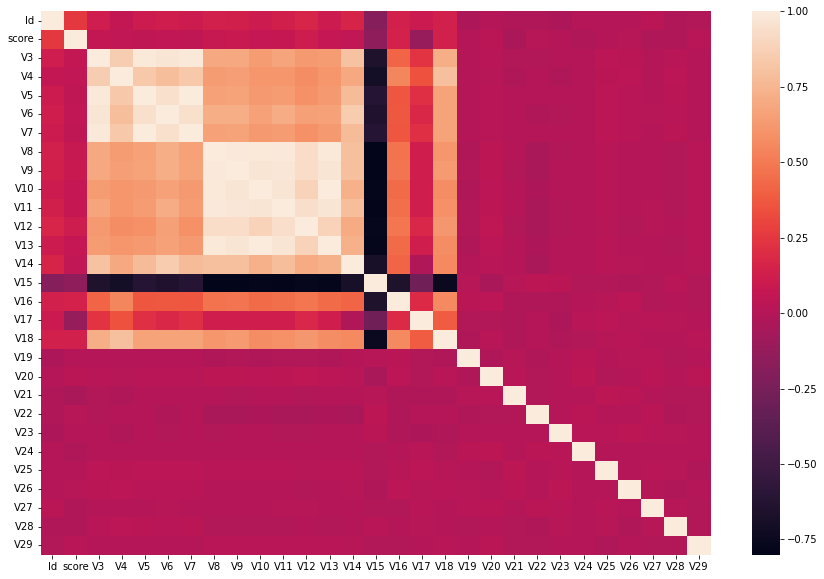

In [13]:
#correlation plot
plt.figure(figsize=(15,10))
corr = train_df.corr()
sns.heatmap(corr)

I will drop all features which have less than 0.05 correlation with the target variable.

In [14]:
 #top 16 values
print (corr['score'].sort_values(ascending=False)[:16], '\n')
print ('----------------------')
#last 13 values`
print (corr['score'].sort_values(ascending=False)[-13:])

score    1.000000
Id       0.248855
V16      0.147671
V18      0.141283
V12      0.112084
V9       0.086131
V8       0.079528
V11      0.073285
V10      0.064929
V13      0.064925
V3       0.061977
V4       0.055533
V6       0.054069
V14      0.051288
V7       0.050226
V5       0.050209
Name: score, dtype: float64 

----------------------
V20    0.026254
V29    0.016380
V26    0.011327
V22    0.010219
V19    0.005401
V23    0.003865
V25   -0.000255
V27   -0.018741
V24   -0.021065
V28   -0.021500
V21   -0.043407
V17   -0.121971
V15   -0.152277
Name: score, dtype: float64


V16, V18 and V12 have the highest correlation to the target variable. 
We need to drop V20, V29, V26, V22, V19, V23, V25, V27, V24, V28, V21, V17, V15, and Id 

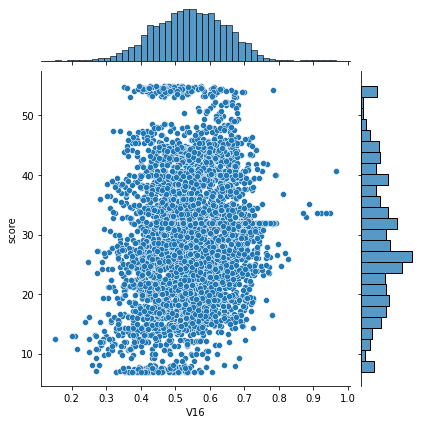

In [15]:
#V16 variable
sns.jointplot(x=train_df['V16'], y=train_df['score'])

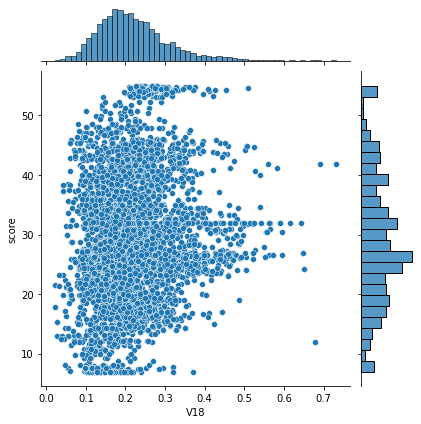

In [16]:
#V18 variable
sns.jointplot(x=train_df['V18'], y=train_df['score'])

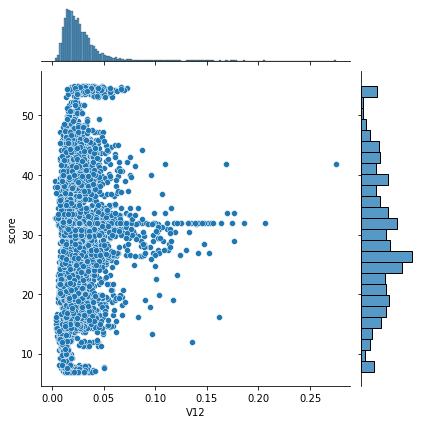

In [17]:
#V12 variable
sns.jointplot(x=train_df['V12'], y=train_df['score'])

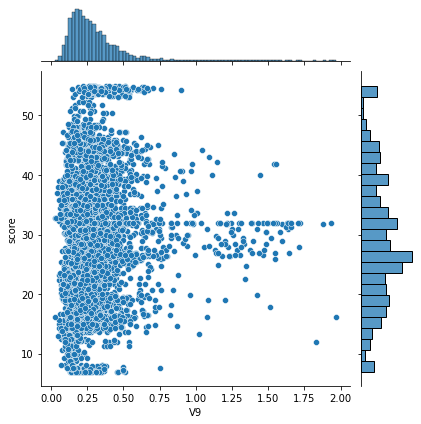

In [18]:
#V9    
sns.jointplot(x=train_df['V9'], y=train_df['score'])

#### Checking for outliers 

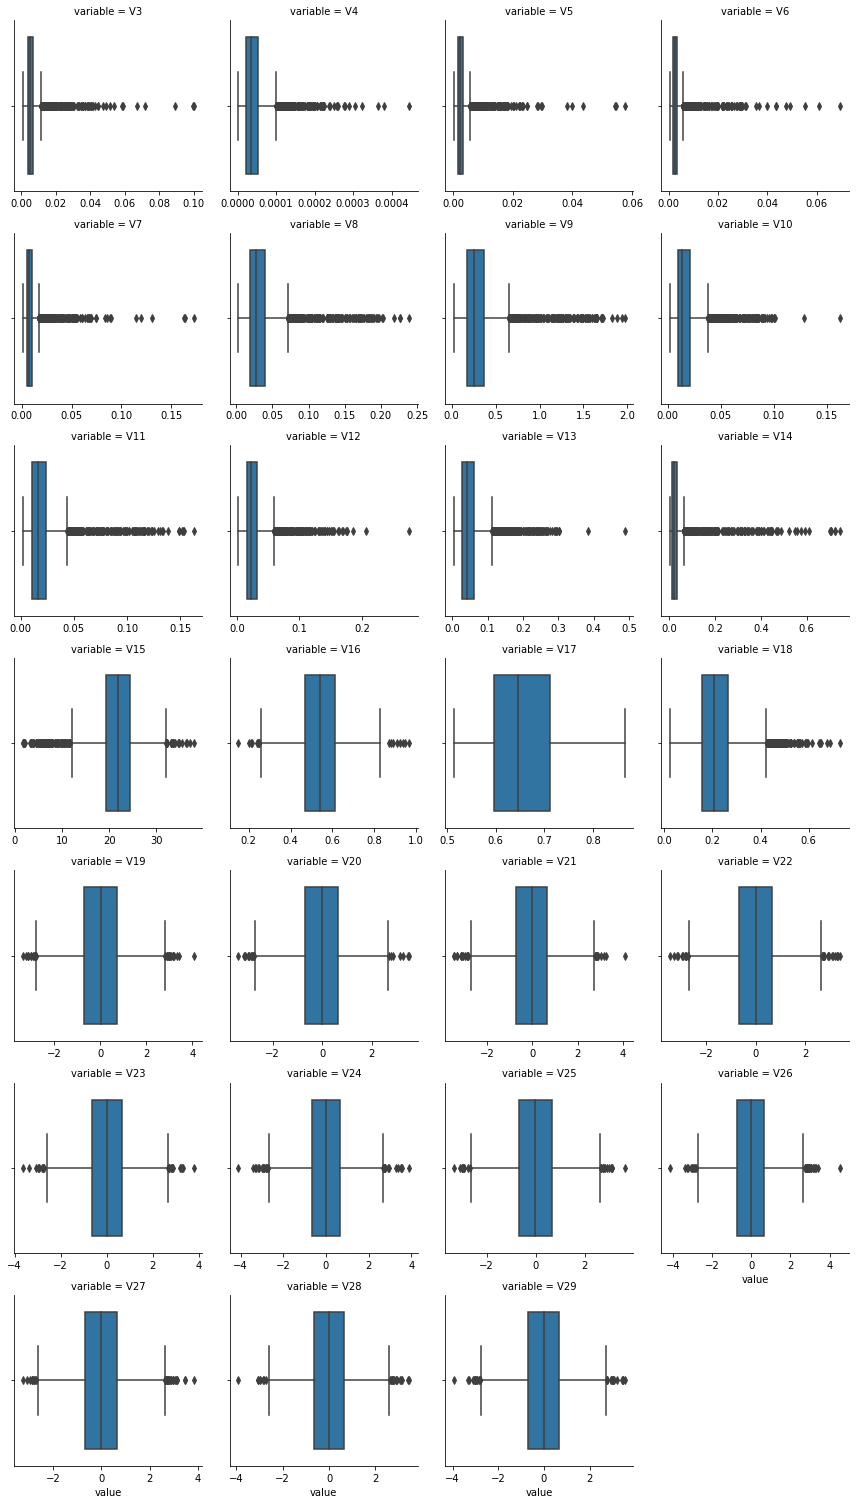

In [19]:
num = [f for f in train_df.columns]
num.remove('Id')
nd = pd.melt(train_df, id_vars='score',value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.boxplot, 'value')
plt.show()

We can see several variables have outliers which we will remove to generalize the model for better prediction.

#### Distribution of each feature
We have to check for skew for all features.

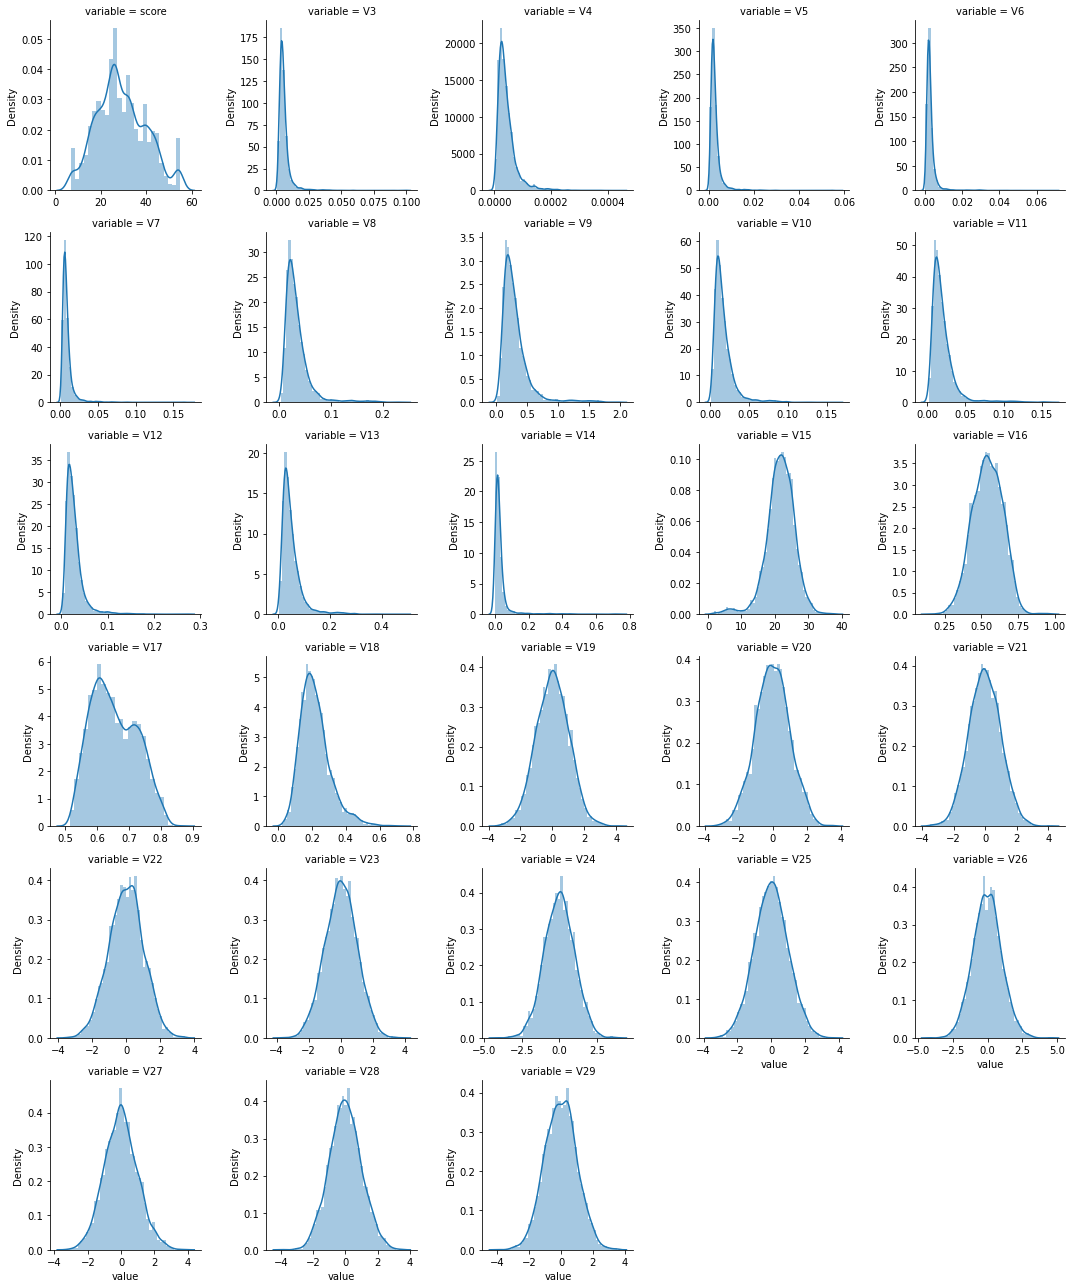

In [20]:
# visualize the distribution of each numerical feature
num = [f for f in train_df.columns]
num.remove('Id')

temp = pd.melt(train_df, value_vars=num)
grid = sns.FacetGrid(temp, col="variable",  col_wrap=5 , size=3.0, 
                     aspect=1.0,sharex=False, sharey=False)
grid.map(sns.distplot, "value")
plt.show()

In [21]:
# print the skewness of each numerical feature
print('V3 : '+ str(train_df['V3'].skew()))
print('V4 : '+ str(train_df['V4'].skew()))
print('V5 : '+ str(train_df['V5'].skew()))
print('V6 : '+ str(train_df['V6'].skew()))
print('V7 : '+ str(train_df['V7'].skew()))
print('V8 : '+ str(train_df['V8'].skew()))
print('V9 : '+ str(train_df['V9'].skew()))
print('V10 : '+ str(train_df['V10'].skew()))
print('V11 : '+ str(train_df['V11'].skew()))
print('V12 : '+ str(train_df['V12'].skew()))
print('V13 : '+ str(train_df['V13'].skew()))
print('V14 : '+ str(train_df['V14'].skew()))
print('V16 : '+ str(train_df['V16'].skew()))
print('V18 : '+ str(train_df['V18'].skew()))

V3 : 6.829657720941573
V4 : 3.1454541524076305
V5 : 7.372803646371555
V6 : 7.865925147260736
V7 : 7.372746719924304
V8 : 3.223187256119256
V9 : 3.024755192863557
V10 : 2.9996868065130653
V11 : 3.5717960069303603
V12 : 3.40061867531066
V13 : 2.999700190050763
V14 : 6.602386930094684
V16 : -0.07030744199033967
V18 : 1.0744949578775622


The skewness between -0.5 and 0.5 are considered fairly symmetrical. Rest all features must be transformed

## Data Pre-processing

1) Drop less correlated features.

2) Remove skewness by transforming data

3) Remove outliers.

4) Apply similar changes to test set.

In [22]:
train_df = train_df.drop(columns=['V20', 'V29', 'V26', 'V22', 'V19', 'V23', 'V25', 'V27', 'V24', 'V28', 'V21', 'V17', 'V15','Id'])

In [23]:
train_df.shape

(4141, 15)

In [24]:
train_df.columns

Index(['score', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
       'V13', 'V14', 'V16', 'V18'],
      dtype='object')

In [25]:
#transforming skewed data
train_df['V3'] = np.log(train_df['V3'])
train_df['V4'] = np.log(train_df['V4'])
train_df['V5'] = np.log(train_df['V5'])
train_df['V6'] = np.log(train_df['V6'])
train_df['V7'] = np.log(train_df['V7'])
train_df['V8'] = np.log(train_df['V8'])
train_df['V9'] = np.log(train_df['V9'])
train_df['V10'] = np.log(train_df['V10'])
train_df['V11'] = np.log(train_df['V11'])
train_df['V12'] = np.log(train_df['V12'])
train_df['V13'] = np.log(train_df['V13'])
train_df['V14'] = np.log(train_df['V14'])
train_df['V16'] = np.log(train_df['V16'])
train_df['V18'] = np.log(train_df['V18'])
##########################################################################
print('V3 : '+ str(train_df['V3'].skew()))
print('V4 : '+ str(train_df['V4'].skew()))
print('V5 : '+ str(train_df['V5'].skew()))
print('V6 : '+ str(train_df['V6'].skew()))
print('V7 : '+ str(train_df['V7'].skew()))
print('V8 : '+ str(train_df['V8'].skew()))
print('V9 : '+ str(train_df['V9'].skew()))
print('V10 : '+ str(train_df['V10'].skew()))
print('V11 : '+ str(train_df['V11'].skew()))
print('V12 : '+ str(train_df['V12'].skew()))
print('V13 : '+ str(train_df['V13'].skew()))
print('V14 : '+ str(train_df['V14'].skew()))
print('V16 : '+ str(train_df['V16'].skew()))
print('V18 : '+ str(train_df['V18'].skew()))

V3 : 0.83755389061565
V4 : 0.06986380877789161
V5 : 0.7781249101889779
V6 : 1.0570736476336178
V7 : 0.7777879111291067
V8 : 0.37727387525098516
V9 : 0.35964813853100525
V10 : 0.181535915219399
V11 : 0.32103491556267244
V12 : 0.2433184530682827
V13 : 0.18149005779572186
V14 : 0.3029907323261063
V16 : -0.695637167824567
V18 : -0.44796490809333983


In [104]:
#Remove outliers
train_df.drop(train_df[train_df['V3'] > 0.012].index, inplace=True)
train_df.drop(train_df[train_df['V4'] > 0.0001].index, inplace=True)
train_df.drop(train_df[train_df['V5'] > 0.006].index, inplace=True)
train_df.drop(train_df[train_df['V6'] > 0.006].index, inplace=True)
train_df.drop(train_df[train_df['V7'] > 0.02].index, inplace=True)
train_df.drop(train_df[train_df['V8'] > 0.08].index, inplace=True)
train_df.drop(train_df[train_df['V9'] > 0.7].index, inplace=True)
train_df.drop(train_df[train_df['V10'] > 0.04].index, inplace=True)
train_df.drop(train_df[train_df['V11'] > 0.05].index, inplace=True)
train_df.drop(train_df[train_df['V12'] > 0.06].index, inplace=True)
train_df.drop(train_df[train_df['V13'] > 0.12].index, inplace=True)
train_df.drop(train_df[train_df['V14'] > 0.07].index, inplace=True)
train_df.drop(train_df[train_df['V16'] > 0.85].index, inplace=True)
train_df.drop(train_df[train_df['V18'] > 0.45].index, inplace=True)
train_df.shape

(4141, 15)

#### Test Data

In [26]:
test_df = test_df.drop(columns=['V20', 'V29', 'V26', 'V22', 'V19', 'V23', 'V25', 'V27', 'V24', 'V28', 'V21', 'V17', 'V15'])

In [27]:
test_df.shape

(1734, 15)

In [28]:
test_df.columns

Index(['Id', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
       'V13', 'V14', 'V16', 'V18'],
      dtype='object')

#### X & Y split

In [29]:
X = train_df.drop(columns='score')

In [30]:
X = X.values

In [31]:
X

array([[ -6.01986402, -10.94931766,  -6.83079424, ...,  -5.15855542,
         -0.77383676,  -2.06183741],
       [ -5.87813586, -10.76245322,  -7.04701735, ...,  -4.6443269 ,
         -0.59631089,  -2.05034887],
       [ -5.49190212, -10.50096098,  -6.42532913, ...,  -3.93652064,
         -0.52278013,  -1.34128276],
       ...,
       [ -5.83617166, -10.4099892 ,  -6.60027058, ...,  -4.67387738,
         -0.58651947,  -1.92366932],
       [ -5.62682143, -10.4070066 ,  -6.2764835 , ...,  -4.4751073 ,
         -0.58242904,  -1.7208165 ],
       [ -4.9675758 ,  -9.62162237,  -5.88171368, ...,  -3.23104963,
         -0.3255778 ,  -1.27991836]])

In [32]:
Y = train_df['score']

In [33]:
Y = Y.values

In [34]:
Y = Y.reshape(-1,1)

In [35]:
Y

array([[34.13 ],
       [19.   ],
       [43.104],
       ...,
       [46.674],
       [38.569],
       [34.101]])

In [36]:
X.shape, Y.shape

((4141, 14), (4141, 1))

#### Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
scalerY = StandardScaler()
X = scalerX.fit_transform(X)
Y = scalerY.fit_transform(Y)

#### Train-test split

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [39]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((3312, 14), (829, 14), (3312, 1), (829, 1))

## Model Creation

#### Linear regression

In [40]:
from sklearn.linear_model import LinearRegression
linearregressor = LinearRegression()

In [41]:
linearregressor.fit(X_train, Y_train)

LinearRegression()

In [42]:
linear_pred = linearregressor.predict(X_test)

#### SVR regression

In [43]:
from sklearn.svm import SVR
svr = SVR()

In [44]:
svr.fit(X_train, Y_train)

SVR()

In [45]:
svr_pred = svr.predict(X_test)

#### Ridge regression

In [46]:
from sklearn.linear_model import Ridge
ridge_regressor = Ridge()

In [47]:
ridge_regressor.fit(X_train, Y_train)

Ridge()

In [48]:
ridge_pred = ridge_regressor.predict(X_test)

#### Lasso regression

In [49]:
from sklearn.linear_model import Lasso
lasso_regressor = Lasso()

In [50]:
lasso_regressor.fit(X_train, Y_train)

Lasso()

In [51]:
lasso_pred = lasso_regressor.predict(X_test)

#### Decision Tree Regressor

In [52]:
from sklearn.tree import DecisionTreeRegressor
decisiontree = DecisionTreeRegressor()

In [53]:
decisiontree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [54]:
decisiontree_pred = decisiontree.predict(X_test)

#### Random Forest regressor

In [55]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()

In [56]:
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [57]:
rf_pred = rf_regressor.predict(X_test)

#### XGBoost regressor

In [58]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [59]:
xgboost_pred = xgb.predict(X_test)

#### ANN:

In [60]:
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [61]:
# Initializing the ANN
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=15, activation='relu'))
ann.add(tf.keras.layers.Dense(units=15, activation='relu'))
ann.add(tf.keras.layers.Dense(units=15, activation='relu'))
ann.add(tf.keras.layers.Dense(units=15, activation='relu'))
ann.add(tf.keras.layers.Dense(units=15, activation='relu'))
ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))
msle = MeanSquaredLogarithmicError()
# Compiling the ANN
ann.compile(optimizer = 'adam', loss = msle, metrics = [msle])

# Training the ANN on the Training set
ann.fit(X_train, Y_train, batch_size = 32, epochs = 100, validation_split=0.2)

Epoch 1/100
83/83 [==============================] - 3s 6ms/step - loss: 0.1483 - mean_squared_logarithmic_error: 0.1483 - val_loss: 0.1196 - val_mean_squared_logarithmic_error: 0.1189
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1320 - mean_squared_logarithmic_error: 0.1320 - val_loss: 0.1170 - val_mean_squared_logarithmic_error: 0.1163
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1303 - mean_squared_logarithmic_error: 0.1304 - val_loss: 0.1175 - val_mean_squared_logarithmic_error: 0.1169
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1288 - mean_squared_logarithmic_error: 0.1288 - val_loss: 0.1141 - val_mean_squared_logarithmic_error: 0.1134
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1274 - mean_squared_logarithmic_error: 0.1275 - val_loss: 0.1136 - val_mean_squared_logarithmic_error: 0.1129
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.

83/83 [==============================] - 0s 2ms/step - loss: 0.0847 - mean_squared_logarithmic_error: 0.0847 - val_loss: 0.1230 - val_mean_squared_logarithmic_error: 0.1230
Epoch 46/100
83/83 [==============================] - 0s 2ms/step - loss: 0.0848 - mean_squared_logarithmic_error: 0.0848 - val_loss: 0.1138 - val_mean_squared_logarithmic_error: 0.1132
Epoch 47/100
83/83 [==============================] - 0s 2ms/step - loss: 0.0836 - mean_squared_logarithmic_error: 0.0836 - val_loss: 0.1209 - val_mean_squared_logarithmic_error: 0.1205
Epoch 48/100
83/83 [==============================] - 0s 2ms/step - loss: 0.0851 - mean_squared_logarithmic_error: 0.0850 - val_loss: 0.1185 - val_mean_squared_logarithmic_error: 0.1182
Epoch 49/100
83/83 [==============================] - 0s 2ms/step - loss: 0.0833 - mean_squared_logarithmic_error: 0.0833 - val_loss: 0.1162 - val_mean_squared_logarithmic_error: 0.1158
Epoch 50/100
83/83 [==============================] - 0s 2ms/step - loss: 0.0826 - 

83/83 [==============================] - 0s 2ms/step - loss: 0.0727 - mean_squared_logarithmic_error: 0.0728 - val_loss: 0.1208 - val_mean_squared_logarithmic_error: 0.1201
Epoch 90/100
83/83 [==============================] - 0s 2ms/step - loss: 0.0704 - mean_squared_logarithmic_error: 0.0705 - val_loss: 0.1211 - val_mean_squared_logarithmic_error: 0.1206
Epoch 91/100
83/83 [==============================] - 0s 2ms/step - loss: 0.0700 - mean_squared_logarithmic_error: 0.0701 - val_loss: 0.1303 - val_mean_squared_logarithmic_error: 0.1301
Epoch 92/100
83/83 [==============================] - 0s 2ms/step - loss: 0.0722 - mean_squared_logarithmic_error: 0.0722 - val_loss: 0.1213 - val_mean_squared_logarithmic_error: 0.1212
Epoch 93/100
83/83 [==============================] - 0s 2ms/step - loss: 0.0697 - mean_squared_logarithmic_error: 0.0697 - val_loss: 0.1275 - val_mean_squared_logarithmic_error: 0.1271
Epoch 94/100
83/83 [==============================] - 0s 2ms/step - loss: 0.0700 - 

In [62]:
ann_pred = ann.predict(X_test)

## Model Evaluation

In [63]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [64]:
print('Linear Regressor:')
print('mean_absolute_error:', mean_absolute_error(Y_test, linear_pred))
print('mean_squared_error:', mean_squared_error(Y_test, linear_pred))

Linear Regressor:
mean_absolute_error: 0.7990138878486618
mean_squared_error: 0.9725434418148272


In [65]:
print('SVR Regressor:')
print('mean_absolute_error:', mean_absolute_error(Y_test, svr_pred))
print('mean_squared_error:', mean_squared_error(Y_test, svr_pred))

SVR Regressor:
mean_absolute_error: 0.7272450796927424
mean_squared_error: 0.8628980763795706


In [66]:
print('Ridge Regressor:')
print('mean_absolute_error:', mean_absolute_error(Y_test, ridge_pred))
print('mean_squared_error:', mean_squared_error(Y_test, ridge_pred))

Ridge Regressor:
mean_absolute_error: 0.7991351508846334
mean_squared_error: 0.9724804683321314


In [67]:
print('Lasso Regressor:')
print('mean_absolute_error:', mean_absolute_error(Y_test, lasso_pred))
print('mean_squared_error:', mean_squared_error(Y_test, lasso_pred))

Lasso Regressor:
mean_absolute_error: 0.8370392156307062
mean_squared_error: 1.050642518695763


In [68]:
print('Decision Tree Regressor:')
print('mean_absolute_error:', mean_absolute_error(Y_test, decisiontree_pred))
print('mean_squared_error:', mean_squared_error(Y_test, decisiontree_pred))

Decision Tree Regressor:
mean_absolute_error: 0.9646467487129906
mean_squared_error: 1.6137703625358146


In [69]:
print('Random Forest regressor:')
print('mean_absolute_error:', mean_absolute_error(Y_test, rf_pred))
print('mean_squared_error:', mean_squared_error(Y_test, rf_pred))

Random Forest regressor:
mean_absolute_error: 0.7136829455652287
mean_squared_error: 0.8079769731397998


In [70]:
print('XGBoost regressor:')
print('mean_absolute_error:', mean_absolute_error(Y_test, xgboost_pred))
print('mean_squared_error:', mean_squared_error(Y_test, xgboost_pred))

XGBoost regressor:
mean_absolute_error: 0.7679852000804933
mean_squared_error: 0.9154191200592323


In [71]:
print('ANN Regressor:')
print('mean_absolute_error:', mean_absolute_error(Y_test, ann_pred))
print('mean_squared_error:', mean_squared_error(Y_test, ann_pred))

ANN Regressor:
mean_absolute_error: 0.8343563015562891
mean_squared_error: 1.0585733065177851


## Hyperparameter Tuning

#### Random Forest

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [74]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [75]:
rf_tuned = RandomForestRegressor(random_state=42)

In [76]:
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [77]:
rf_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [78]:
rf_cv.best_score_

0.20250676976245785

In [79]:
rf_cv.best_params_

{'n_estimators': 142, 'max_depth': 110}

In [80]:
rf_final = RandomForestRegressor(
    max_depth=110, n_estimators=142, random_state=42)

In [81]:
rf_final.fit(X_train, Y_train)

RandomForestRegressor(max_depth=110, n_estimators=142, random_state=42)

In [82]:
rf_final_pred = rf_final.predict(X_test)

In [83]:
print('Hypertuned RandomForest Regressor:')
print('mean_absolute_error:', mean_absolute_error(Y_test, rf_final_pred))
print('mean_squared_error:', mean_squared_error(Y_test, rf_final_pred))

Hypertuned RandomForest Regressor:
mean_absolute_error: 0.7015575539583458
mean_squared_error: 0.7787078832538008


#### XGBoost

In [84]:
xgb1 = XGBRegressor()

In [85]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [86]:
random_search1=RandomizedSearchCV(xgb1,param_distributions=params,n_iter=5,scoring=MeanSquaredLogarithmicError(),
                                 n_jobs=-1,cv=5,verbose=2)

In [87]:
random_search1.fit(X_train, Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          tree_method=None,
                                          validate_parameters=None,
                                          verbosity=None),
    

In [88]:
random_search1.best_params_

{'min_child_weight': 5,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 0.0,
 'colsample_bytree': 0.5}

In [89]:
xgb_final = XGBRegressor(
    max_depth=10, min_child_weight=3, learning_rate=0.15, gamma = 0.4, colsample_bytree = 0.4)

In [90]:
xgb_final.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, enable_categorical=False,
             gamma=0.4, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=10, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [91]:
xgb_final_pred = xgb_final.predict(X_test)

In [92]:
print('XGBoost:')
print('mean_absolute_error:', mean_absolute_error(Y_test, xgb_final_pred))
print('mean_squared_error:', mean_squared_error(Y_test, xgb_final_pred))

XGBoost:
mean_absolute_error: 0.7783635169377756
mean_squared_error: 0.929069837163907


## Test set submission

In [93]:
test = test_df.copy()

In [94]:
test_df = test_df.drop(columns = ['V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13',
       'V14', 'V16', 'V18'])

In [95]:
test_df.columns

Index(['Id'], dtype='object')

In [96]:
test_df.shape

(1734, 1)

In [97]:
#transforming skewed data
test['V3'] = np.log(test['V3'])
test['V4'] = np.log(test['V4'])
test['V5'] = np.log(test['V5'])
test['V6'] = np.log(test['V6'])
test['V7'] = np.log(test['V7'])
test['V8'] = np.log(test['V8'])
test['V9'] = np.log(test['V9'])
test['V10'] = np.log(test['V10'])
test['V11'] = np.log(test['V11'])
test['V12'] = np.log(test['V12'])
test['V13'] = np.log(test['V13'])
test['V14'] = np.log(test['V14'])
test['V16'] = np.log(test['V16'])
test['V18'] = np.log(test['V18'])

In [98]:
test = test.drop(columns=['Id'])
test = test.values
test = scalerX.transform(test)

In [99]:
result = rf_final.predict(test)
result = result.reshape(-1,1)

In [100]:
#result1 = xgb_final.predict(test)
#result1 = result1.reshape(-1,1)

In [101]:
#final = (result+result1)/2
#final = final.reshape(-1,1)

In [102]:
test_df['Expected'] = scalerY.inverse_transform(result)

In [103]:
test_df.to_csv('D:/submission.csv',  index=False)

# Kaggle Score: 10.16522
# Kaggle Score: 9.21663